# 05-Oct-2022

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image, HTML, display

## Summary of goals
1. Increasing the number of snapshots and check its effect on the singularvalues and modes
2. More accurate way of choosing the number of modes

## 1. Size of the snapshot matrix
In this section we want to inverstigate the effect of increasing the number of snapshots in accuracy of modes. Below, are the plots for 3 cases:
- 10 snapshots
- 25 snapshots
- 50 snapshots

First plot shows the singularvalues, 2nd plot shows the eigenvalues before and after the SVD approximation, and the 3rd plot shows the amplification factors before and after the SVD approximation.

In [26]:
s10 = np.genfromtxt("./data/s10.dat", delimiter='\t')
s25 = np.genfromtxt("./data/s25.dat", delimiter='\t')
s50 = np.genfromtxt("./data/s50.dat", delimiter='\t')

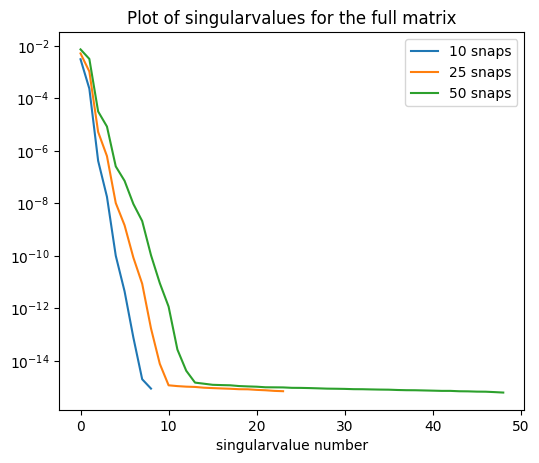

In [164]:
fig = plt.figure(figsize=(6, 5), dpi=100)
plt.plot(s10[:,0], label = '10 snaps')
plt.plot(s25[:,0], label = "25 snaps")
plt.plot(s50[:,0], label = "50 snaps")
plt.yscale('log'), plt.xlabel('singularvalue number')
plt.legend()
plt.title('Plot of singularvalues for the full matrix')
plt.show()

From this plot, we can see that by increasing the number of snapshots, the singularvalues change a little and we can compute more non-zero modes.

In [98]:
eigs10 = pd.read_table('./data/eigen10.dat', sep='\t', skiprows=1, usecols=(0, 1, 2, 4, 5), names=["num", "sigma-Real", "sigma-Imag", "real", "imag"])
eigs25 = pd.read_table('./data/eigen25.dat', sep='\t', skiprows=1, usecols=(0, 1, 2, 4, 5), names=["num", "sigma-Real", "sigma-Imag", "real", "imag"])
eigs50 = pd.read_table('./data/eigen50.dat', sep='\t', skiprows=1, usecols=(0, 1, 2, 4, 5), names=["num", "sigma-Real", "sigma-Imag", "real", "imag"])

eigmodes10 = pd.read_table('./data/eigmodes10.dat', sep='\t', skiprows=1, usecols=(0, 1, 2, 4, 5), names=["num", "sigma-Real", "sigma-Imag", "real", "imag"])
eigmodes25 = pd.read_table('./data/eigmodes25.dat', sep='\t', skiprows=1, usecols=(0, 1, 2, 4, 5), names=["num", "sigma-Real", "sigma-Imag", "real", "imag"])
eigmodes50 = pd.read_table('./data/eigmodes50.dat', sep='\t', skiprows=1, usecols=(0, 1, 2, 4, 5), names=["num", "sigma-Real", "sigma-Imag", "real", "imag"])

Text(0.5, 1.0, 'low-dimensional (The SVD truncation)')

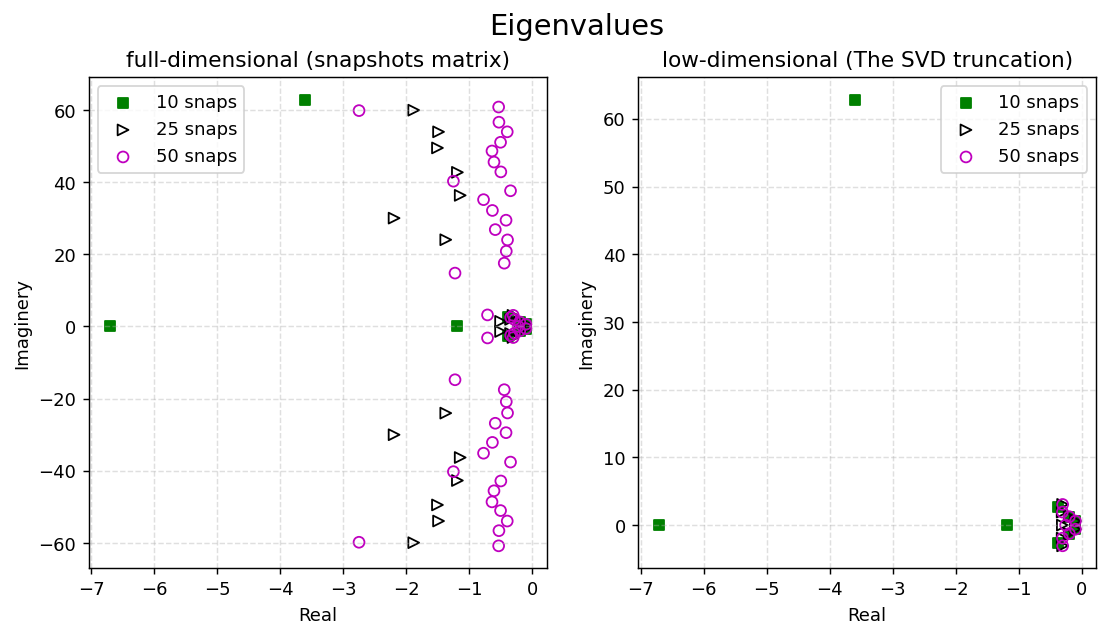

In [180]:
fig = plt.figure(figsize=(10,5), dpi=130)
rows = 1; cols = 2
fig.suptitle('Eigenvalues', fontsize=16)

ax = fig.add_subplot(rows, cols, 1)
ax.scatter(eigs10["real"], eigs10["imag"], label="10 snaps", marker=",", color='g')
ax.scatter(eigs25["real"], eigs25["imag"], marker='>', facecolors='none', edgecolors='k', label="25 snaps")
ax.scatter(eigs50["real"], eigs50["imag"], marker='o', facecolors='none', edgecolors='m', label="50 snaps")
plt.xlabel("Real"); plt.ylabel("Imaginery"); plt.legend(); plt.grid(linestyle='--', alpha=0.4)
plt.title('full-dimensional (snapshots matrix)')

ax = fig.add_subplot(rows, cols, 2)
ax.scatter(eigmodes10["real"], eigmodes10["imag"], label="10 snaps", marker=",", color='g')
ax.scatter(eigmodes25["real"], eigmodes25["imag"], marker='>', facecolors='none', edgecolors='k', label="25 snaps")
ax.scatter(eigmodes50["real"], eigmodes50["imag"], marker='o', facecolors='none', edgecolors='m', label="50 snaps")
plt.xlabel("Real"); plt.ylabel("Imaginery"); plt.legend(); plt.grid(linestyle='--', alpha=0.4)
plt.title('low-dimensional (The SVD truncation)')


This plot shows the dominant eigenvalues of the problem computed through the DMD algorithm. <br>
The left plot shows all the computed eigenvalues before doing the SVD approximation, hence we have 9, 24, and 49 eigenvalues in the plot for our different cases. The right plot shows the first 9 dominant modes for those cases.<br>
By looking at the dominant eigenvalues of the case with 10 snapshots, we can see 3 outliers that are not consistent with the other cases with increased number of snapshots. But for the other two cases (25 and 50 snapshots) we have more consistent results in finding the eigenvalues of the dominant modes.


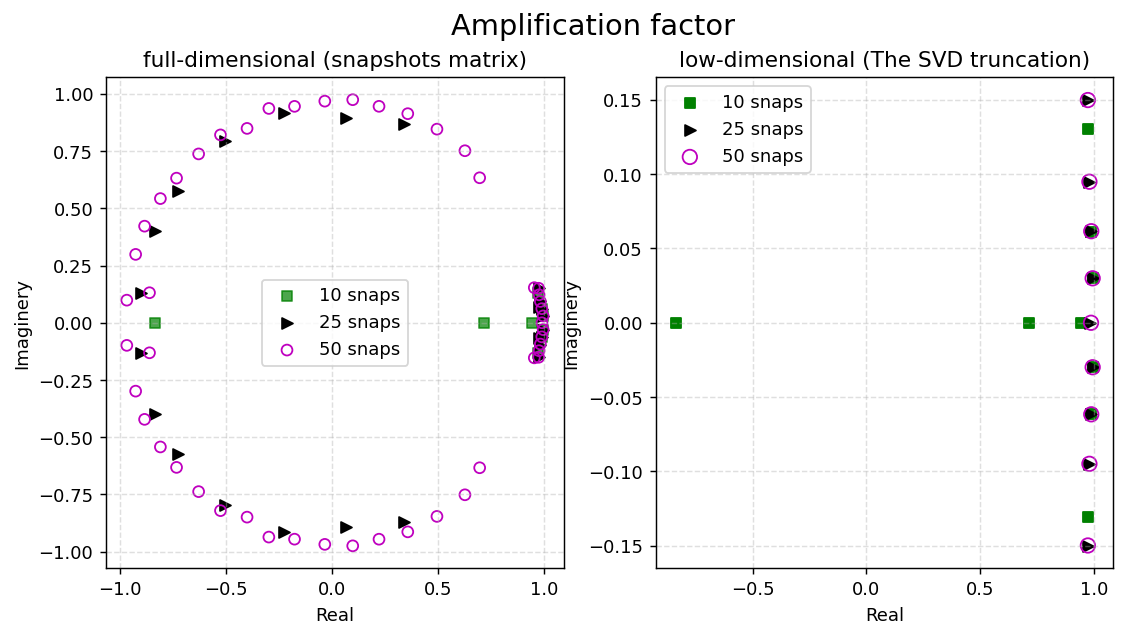

In [179]:
fig = plt.figure(figsize=(10,5), dpi=130)
rows = 1; cols = 2
fig.suptitle('Amplification factor', fontsize=16)

ax = fig.add_subplot(rows, cols, 1)
ax.scatter(eigs10["sigma-Real"], eigs10["sigma-Imag"], marker=",", alpha=0.7, color='g', label="10 snaps")
ax.scatter(eigs25["sigma-Real"], eigs25["sigma-Imag"], marker='>', color='k', label="25 snaps")
ax.scatter(eigs50["sigma-Real"], eigs50["sigma-Imag"], marker='o', facecolors='none', edgecolors='m', label="50 snaps")
plt.xlabel("Real"); plt.ylabel("Imaginery"); plt.legend(); plt.grid(linestyle='--', alpha=0.4)
plt.title('full-dimensional (snapshots matrix)')


ax = fig.add_subplot(rows, cols, 2)
ax.scatter(eigmodes10["sigma-Real"], eigmodes10["sigma-Imag"], marker=",", color='g', label="10 snaps")
ax.scatter(eigmodes25["sigma-Real"], eigmodes25["sigma-Imag"], marker='>', color='k', alpha=1, label="25 snaps")
ax.scatter(eigmodes50["sigma-Real"], eigmodes50["sigma-Imag"], marker='o', facecolors='none', edgecolors='m', s=2**6, label="50 snaps")
plt.xlabel("Real"); plt.ylabel("Imaginery"); plt.legend(); plt.grid(linestyle='--', alpha=0.4)
plt.title('low-dimensional (The SVD truncation)')

plt.show()

This plot shows the amplification factors of the dominant modes for cases with different snapshts. The left plot shows all the amplification factors of the snapshots matrix (full-space), and the right plot shows the amplification factors of its SVD-approximation (low-dimensional subspace). <br>
Frpm this plot we can see that we get more accurate and consistent results for increased number of snapshots.

Conclusion: More data is always better. <strong>More data decreases the error of the eigenvalues we get in the low-dimensional space.</strong> <br>
With less data the number of accurate dominant modes decreases, and more data provides more accurate dominant modes for us to work with.

## 2. Rank of SVD truncation


In [190]:
display(HTML("<table><tr><td><img src='Poisson1D - Mixed solution modes.png' width=600></td><td><img src='Poisson1D - Solution change mode decomposition.png' width=600></td></tr></table>"))

,


Plots above show the spatial modes of the 1D Poisson problem. The ratio of the singularvalues of the dominant modes are as follows:<br>
<table class="minimalistBlack">
<thead>
<tr>
<th>&nbsp;***********</th>
<th>&nbsp;Left plot</th>
<th>&nbsp;Right plot</th>
</tr>
</thead>
<tr>
<td>&nbsp;$\dfrac{\sigma_2}{\sigma_1}$</td>
<td>&nbsp;0.018867924528301886</td>
<td>&nbsp;0.00024307243558580456</td>
</tr>
</table>

We can see that for the left plot that the 1st and 2nd modes are simillar we have a higher ratio, and for the right plot that the modes are different we have a smaller ratio. From this we can say that if singularvalues are close in magnitude, we have simillar modes, and the more different the singularvalues are, the more different the modes.<br>
The plot below shows the ratio of singularvalues ($\dfrac{\sigma_2}{\sigma_1}$) for a Navier--Stokes problem on a structured mesh. This plot can tell us if two modes are from a complex conjugate pair of eigenvalues or not, and we can tell that by the idea above. <br>
<strong>The higher the ratio of singularvalues, the more similar those modes are.</strong>

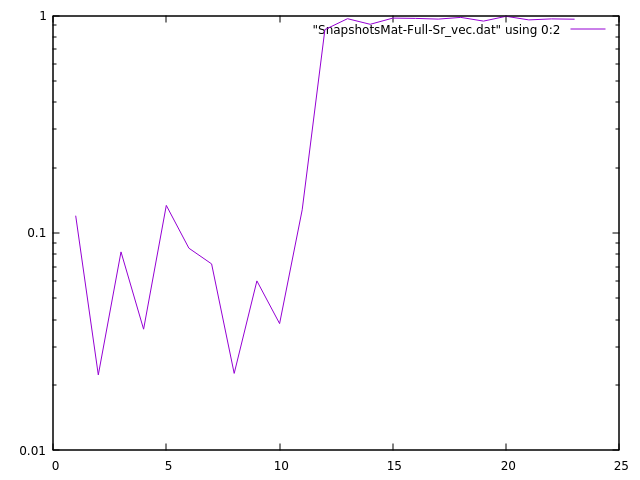

In [191]:
Image("Singularvalue_ratio_plot.png")